#### 셀레니움 크롤링결과로 분석

#### 데이터 로드, 전처리

In [17]:
import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import seaborn as sns

font_path = 'C:/Windows/Fonts/Hancom Gothic Bold.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 'NanumGothic'
rc('font', family=font)
rcParams['axes.unicode_minus'] = False 

In [18]:
# 추가 라이브러리 임포트
import pandas as pd
import numpy as np

In [19]:
# 데이터로드
df = pd.read_excel('./1_crawling_jejudoHotplaces.xlsx')
df

,content,data,like,place,tags
0,arcco_iris_저희가 제주 공항 출발할때 가장 먼저 입었던 코디 !-은은하게 ...,2023-06-28,1306,NaN,[]
1,"beli._azagi._u(광고)애월에서 가성비 좋은 흑돼지 전문점을 찾는다면 ""애...",2023-06-29,0,애월읍 애월해안로 97,"['#제주애월맛집', '#애월맛집', '#제주도흑돼지맛집', '#제주흑돼지맛집', ..."
2,osun_23오늘도 정시에 오픈했어용😊 정성 가득 담아 준비했어요🥰 식사하러 오세용...,2023-06-29,3,NaN,"['#선흘리맛집', '#함덕맛집', '#제주도맛집', '#조천읍맛집', '#흑돼지두..."
3,luna.player여자들은 공감함 ㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━━━━━━━...,2023-06-27,825,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
4,nato.tving@@ 이렇게 자는 사람?? ㅋㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━...,2023-06-26,892,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
...,...,...,...,...,...
495,_astorstrans(광고)제주도에서 쓰끼다시가 가장 잘나오고 서귀포에서 오션뷰로...,2023-06-28,0,서귀포시 대포로 16111,"['#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도..."
496,hamdeok42안녕하세요 함사입니다 :)오늘은 하늘이 예뻐서 비행기 구경하러 스탭...,2023-06-28,31,NaN,"['#시로코', '#함덕사이게스트하우스-------------------------..."
497,leonila_waid2023(협찬) @cafe_the_light_jeju💗제주도에...,2023-06-28,1082,성산읍 한도로 269,"['#제주여행', '#제주카페', '#성산일출봉카페', '#제주카페추천', '#제주..."
498,_bi._ply_w__(리그램) @dotoree_jeju두둥 ! 맛집러들 다 모여📢...,2023-06-28,0,제주시 북성로 59,"['#제주공항근처맛집', '#제주공항근처맛집추천', '#제주맛집', '#제주맛집추천..."


In [20]:
# 중복제거 - content 컬럼기준
#  df.drop_duplicates(subset=['content'], inplace=True)
jeju_df = df.drop_duplicates(subset=['content'])

In [21]:
# 중복데이터 35개 삭제
jeju_df = jeju_df.reset_index(drop=True)
jeju_df

,content,data,like,place,tags
0,arcco_iris_저희가 제주 공항 출발할때 가장 먼저 입었던 코디 !-은은하게 ...,2023-06-28,1306,NaN,[]
1,"beli._azagi._u(광고)애월에서 가성비 좋은 흑돼지 전문점을 찾는다면 ""애...",2023-06-29,0,애월읍 애월해안로 97,"['#제주애월맛집', '#애월맛집', '#제주도흑돼지맛집', '#제주흑돼지맛집', ..."
2,osun_23오늘도 정시에 오픈했어용😊 정성 가득 담아 준비했어요🥰 식사하러 오세용...,2023-06-29,3,NaN,"['#선흘리맛집', '#함덕맛집', '#제주도맛집', '#조천읍맛집', '#흑돼지두..."
3,luna.player여자들은 공감함 ㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━━━━━━━...,2023-06-27,825,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
4,nato.tving@@ 이렇게 자는 사람?? ㅋㅋㅋㅋㅋㅋㅋㅋ (광고)━━━━━━━━...,2023-06-26,892,NaN,"['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'..."
...,...,...,...,...,...
460,_astorstrans(광고)제주도에서 쓰끼다시가 가장 잘나오고 서귀포에서 오션뷰로...,2023-06-28,0,서귀포시 대포로 16111,"['#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도..."
461,hamdeok42안녕하세요 함사입니다 :)오늘은 하늘이 예뻐서 비행기 구경하러 스탭...,2023-06-28,31,NaN,"['#시로코', '#함덕사이게스트하우스-------------------------..."
462,leonila_waid2023(협찬) @cafe_the_light_jeju💗제주도에...,2023-06-28,1082,성산읍 한도로 269,"['#제주여행', '#제주카페', '#성산일출봉카페', '#제주카페추천', '#제주..."
463,_bi._ply_w__(리그램) @dotoree_jeju두둥 ! 맛집러들 다 모여📢...,2023-06-28,0,제주시 북성로 59,"['#제주공항근처맛집', '#제주공항근처맛집추천', '#제주맛집', '#제주맛집추천..."


#### 전처리 중간

- tags, place로 dropna, 걸측치제거 필요할 수 있음
- 숫자로 통계를 내는 게 아니면 걸측치제거는 옵션

#### 워드 클라우드

글자를 구름형태로 표현한 것



In [22]:
del df

In [23]:
jeju_df['tags'][:5]

0                                                   []
1    ['#제주애월맛집', '#애월맛집', '#제주도흑돼지맛집', '#제주흑돼지맛집', ...
2    ['#선흘리맛집', '#함덕맛집', '#제주도맛집', '#조천읍맛집', '#흑돼지두...
3    ['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'...
4    ['#유머스타그램', '#유머저장소', '#웃긴짤', '#웃긴영상', '#웃긴사진'...
Name: tags, dtype: object

In [24]:
# 해시태그 모으기
tags_total = []

for tags in jeju_df['tags']: # 하나하나 리스트
    tags_list = tags[2:-2].split("','") # [2 - 2] ==> [', '] 를 제거
    for tag in tags_list:
        if tag != '': # 빈태그 삭제
            if tag.find('\\u200b'): # 유니코드 space tag 삭제처리
                tags_total.append(tag.split('\\u200b')[0])
            else:
                tags_total.append(tag)

len(tags_total)

400

In [25]:
# 해시태그 출현빈도 집계
from collections import Counter
tags_counts = Counter(tags_total)

In [26]:
tags_counts.most_common(100)

[("#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도횟집', '#중문맛집', '#제주횟집', '#제주도민맛집', '#제주오션뷰맛집', '#서귀포맛집추천', '#제주도맛집21시간",
  6),
 ("#제주도카페', '#제주카페', '#제주맛집', '#제주도맛집', '#성산일출봉', '#섭지코지', '#제주아쿠아플라넷', '#제주베이커리카페', '#제주베이커리맛집', '#제주빵지순례', '#제주카페추천', '#제주카페투어', '#성산카페', '#애월카페', '#구좌읍맛집', '#구좌읍카페', '#성산맛집', '#성산카페', '#구좌읍브런치', '#성산브런치', '#제주브런치카페', '#제주브런치', '#제주브런치맛집', '#성산일출봉카페', '#우도카페1시간",
  4),
 ("#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도횟집', '#중문맛집', '#제주횟집', '#제주도민맛집', '#제주오션뷰맛집', '#서귀포맛집추천', '#제주도맛집5시간",
  4),
 ("#제주도카페', '#제주카페', '#제주맛집', '#제주도맛집', '#성산일출봉', '#섭지코지', '#제주아쿠아플라넷', '#제주베이커리카페', '#제주베이커리맛집', '#제주빵지순례', '#제주카페추천', '#제주카페투어', '#성산카페', '#애월카페', '#구좌읍맛집', '#구좌읍카페', '#성산맛집', '#성산카페', '#구좌읍브런치', '#성산브런치', '#제주브런치카페', '#제주브런치', '#제주브런치맛집', '#성산일출봉카페', '#우도카페5시간",
  4),
 ("#제주공항근처맛집', '#제주공항근처맛집추천', '#제주맛집', '#제주맛집추천', '#제주맛집투어', '#제주맛집탐방', '#제주도맛집', '#제주도맛집추천', '#제주도맛집베스트', '#제주도맛집투어', '#제주시맛집', '#제주시맛집추천', '#제주', '#제주여행', '#제주도', '#청귤소바7시간",
  4),
 ("#서귀포맛집', '#제주중문맛집', '

#### 데이터 정체

해시태그 중 맛집과 관련없는 태그 삭제

In [27]:
delwords = ['#제주여행', '#제주도', '#제주', '#제주가볼만한곳', '#제주도여행', '#제주여행코스', '#애월가볼만한곳', '#새별오름', '#제주살이', '#제주해저',
            '#제주데이트', '#맞팔', '#제주도날씨', '#여행', '#제주일상', '#제주도가볼만한곳', '#제주도가족여행', '#jeju', '#아는형님게스트하우스',
             '#서울맛집' ]

total_tags = []
for tag in tags_total:
    if tag not in delwords:
        total_tags.append(tag)

total_tags_counts = Counter(total_tags)
total_tags_counts.most_common(10)

[("#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도횟집', '#중문맛집', '#제주횟집', '#제주도민맛집', '#제주오션뷰맛집', '#서귀포맛집추천', '#제주도맛집21시간",
  6),
 ("#제주도카페', '#제주카페', '#제주맛집', '#제주도맛집', '#성산일출봉', '#섭지코지', '#제주아쿠아플라넷', '#제주베이커리카페', '#제주베이커리맛집', '#제주빵지순례', '#제주카페추천', '#제주카페투어', '#성산카페', '#애월카페', '#구좌읍맛집', '#구좌읍카페', '#성산맛집', '#성산카페', '#구좌읍브런치', '#성산브런치', '#제주브런치카페', '#제주브런치', '#제주브런치맛집', '#성산일출봉카페', '#우도카페1시간",
  4),
 ("#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도횟집', '#중문맛집', '#제주횟집', '#제주도민맛집', '#제주오션뷰맛집', '#서귀포맛집추천', '#제주도맛집5시간",
  4),
 ("#제주도카페', '#제주카페', '#제주맛집', '#제주도맛집', '#성산일출봉', '#섭지코지', '#제주아쿠아플라넷', '#제주베이커리카페', '#제주베이커리맛집', '#제주빵지순례', '#제주카페추천', '#제주카페투어', '#성산카페', '#애월카페', '#구좌읍맛집', '#구좌읍카페', '#성산맛집', '#성산카페', '#구좌읍브런치', '#성산브런치', '#제주브런치카페', '#제주브런치', '#제주브런치맛집', '#성산일출봉카페', '#우도카페5시간",
  4),
 ("#제주공항근처맛집', '#제주공항근처맛집추천', '#제주맛집', '#제주맛집추천', '#제주맛집투어', '#제주맛집탐방', '#제주도맛집', '#제주도맛집추천', '#제주도맛집베스트', '#제주도맛집투어', '#제주시맛집', '#제주시맛집추천', '#제주', '#제주여행', '#제주도', '#청귤소바7시간",
  4),
 ("#서귀포맛집', '#제주중문맛집', '

In [28]:
#막대차트 그리기
tags_df = pd.DataFrame(total_tags_counts.most_common(71))
tags_df.columns = ['태그', '빈도수']
tags_df

,태그,빈도수
0,"#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도횟집...",6
1,"#제주도카페', '#제주카페', '#제주맛집', '#제주도맛집', '#성산일출봉',...",4
2,"#서귀포맛집', '#제주중문맛집', '#서귀포횟집', '#중문횟집', '#제주도횟집...",4
3,"#제주도카페', '#제주카페', '#제주맛집', '#제주도맛집', '#성산일출봉',...",4
4,"#제주공항근처맛집', '#제주공항근처맛집추천', '#제주맛집', '#제주맛집추천',...",4
...,...,...
66,"#5L2F포근한', '#제주맛집', '#제주도맛집', '#제주카페', '#제주도카페...",1
67,"#아줄레주찾았다..', '#제주맛집', '#제주도맛집', '#제주카페', '#제주도...",1
68,"#온평바다한그릇해녀가', '#제주맛집', '#제주도맛집', '#제주카페', '#제주...",1
69,"#소통', '#데일리룩', '#줌마소통', '#육아...",1


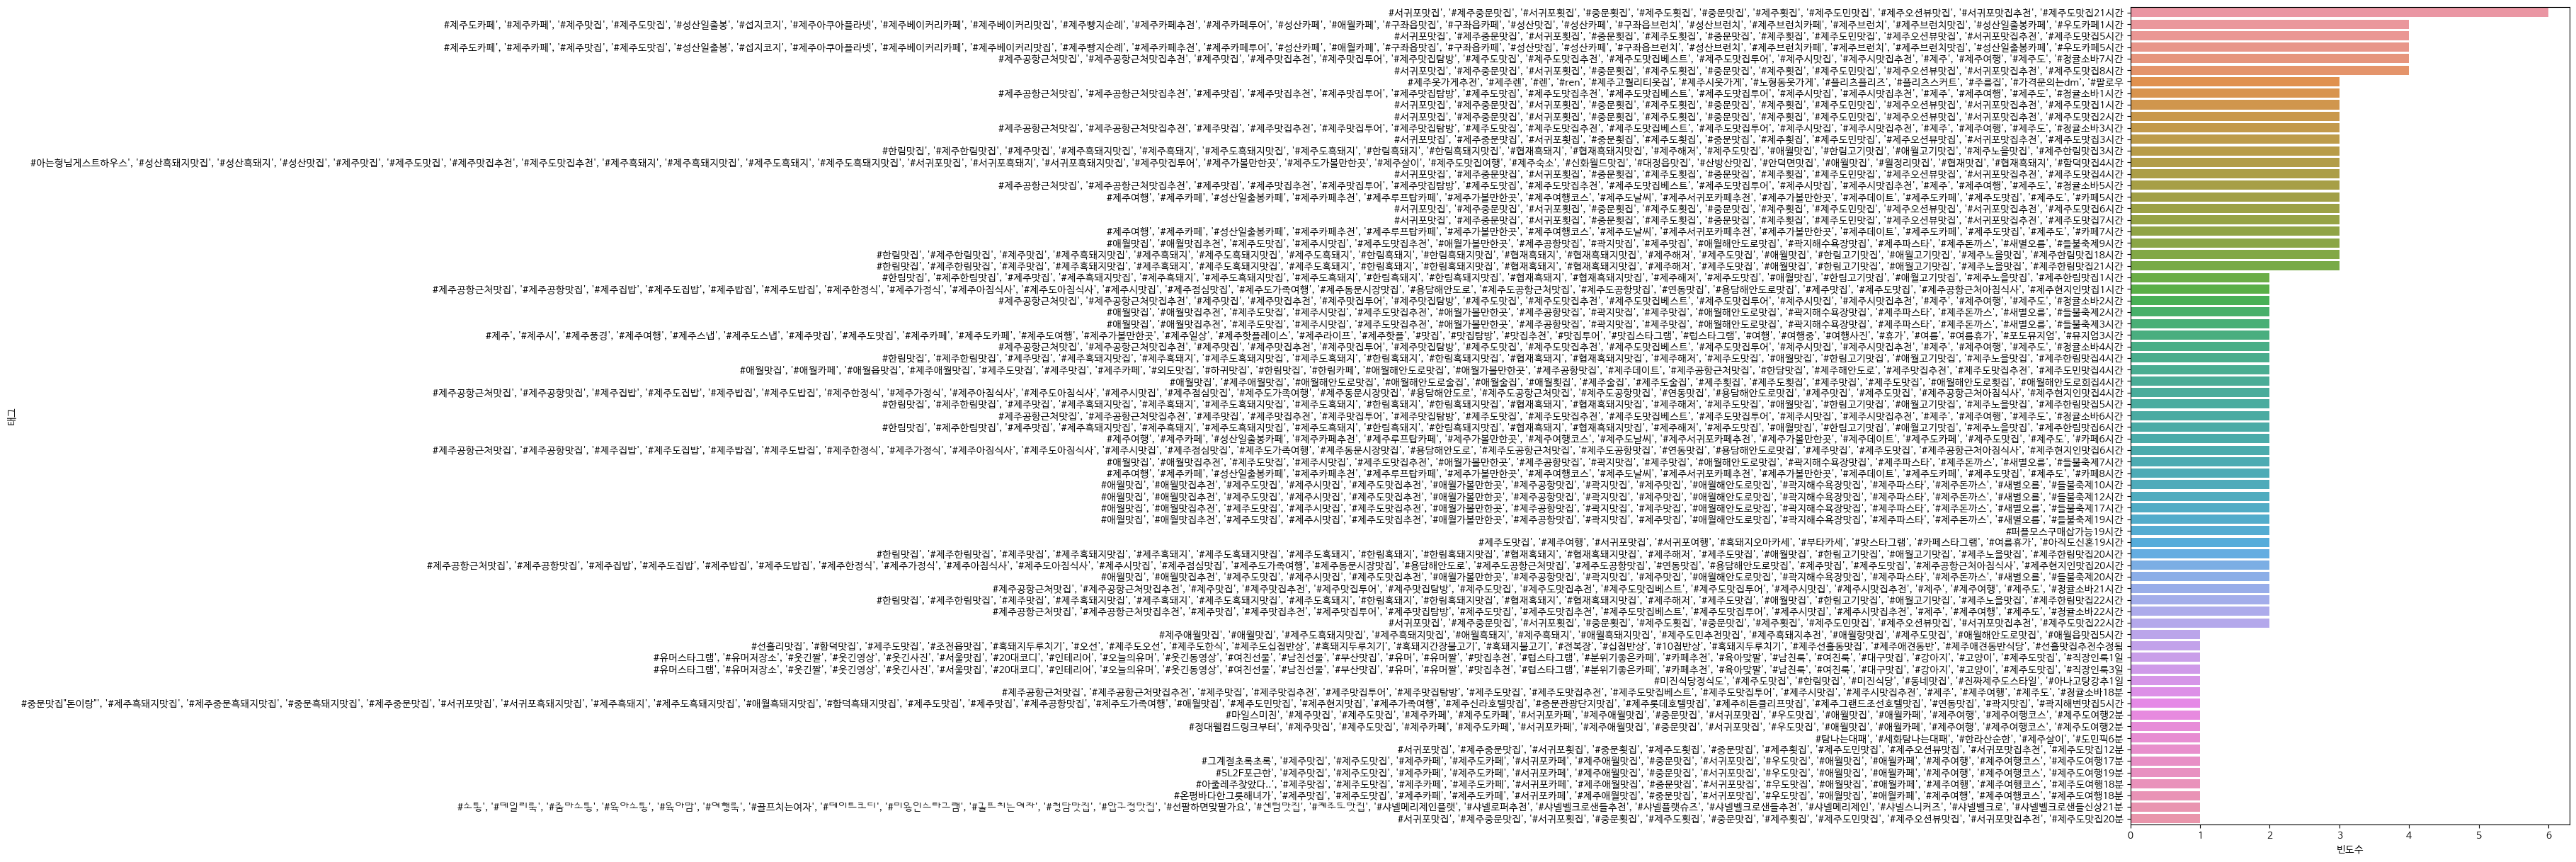

In [29]:
# 막대차트
plt.figure(figsize=(8, 15))
sns.barplot(x='빈도수', y='태그', data=tags_df)
plt.show()

#### 워드 클라우드

```python
!pip install wordcloud

In [30]:
!pip install wordcloud

In [31]:
tags_select = total_tags_counts.most_common(71)
type(tags_select)

list

In [32]:
# 워드 클라우드 한글 문제해결
from wordcloud import wordcloud
from PIL import Image, ImageOps

fontpath = 'C:/Windows/Fonts/BlackHanSans-Regular.ttf'
tag_last = dict(total_tags_counts.most_common(71))

wc = wordcloud(font_path=font_path, background_color= 'lightgray', max_words=100, relative_scaling=0.3,
               width=900, height=500).generate_from_frequencies(tags_last)
plt.figyre(figsize=(15,10))
plt.imshow(wc, interpolation='biliner')
plt.axis('off')
plt.show()

TypeError: 'module' object is not callable

In [33]:
mask

NameError: name 'mask' is not defined